# 1. Анилиз данных

In [2]:
# Импорт библиотек

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

In [3]:
# Чтение данных из файла

df = pd.read_csv('test_task_data.csv', index_col=0) 
df.head(20)

,user_id,platform,reg_date,steps_date,steps
0,41785284,IOS,2021-04-21,2021-04-13,458
1,41792465,IOS,2021-04-21,2021-04-13,5750
2,41494466,IOS,2021-03-28,2021-04-01,5635
3,41583452,IOS,2021-04-02,2021-04-01,1840
4,41637532,IOS,2021-04-07,2021-04-01,3127
5,41578997,ANDROID,2021-04-01,2021-04-01,1603
6,41574472,IOS,2021-04-01,2021-04-01,10697
7,41719379,IOS,2021-04-14,2021-04-01,2509
8,41455690,IOS,2021-03-26,2021-04-01,3309
9,41600031,IOS,2021-04-03,2021-03-31,114


In [4]:
# Кол-во уникальных юзеров

df['user_id'].nunique()

3531

In [5]:
df.tail()

,user_id,platform,reg_date,steps_date,steps
81544,40888496,IOS,2021-01-29,2021-02-07,350
81545,41010128,ANDROID,2021-02-11,2021-02-07,0
81546,40741168,IOS,2021-01-15,2021-01-02,10292
81547,40736310,ANDROID,2021-01-15,2021-01-02,0
81548,40748682,ANDROID,2021-01-16,2021-01-02,0


In [6]:
# В файле 81549 строк и 5 столбцов

df.shape

(81549, 5)

In [7]:
df.describe()

,user_id,steps
count,8.154900e+04,81549.000000
mean,4.120154e+07,3933.511607
std,9.254097e+05,4826.587260
min,1.666115e+07,0.000000
25%,4.098995e+07,104.000000
50%,4.123912e+07,2187.000000
75%,4.148435e+07,6026.000000
max,4.180368e+07,60043.000000


In [8]:
# Имеются записи с 0 шагами
# Удалим такие записи (таких 1% от уников или 23% от всех записей)

df = df[df['steps']>0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62754 entries, 0 to 81546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     62754 non-null  int64 
 1   platform    62684 non-null  object
 2   reg_date    62754 non-null  object
 3   steps_date  62754 non-null  object
 4   steps       62754 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.9+ MB


In [10]:
df['user_id'].nunique()

3482

In [11]:
# дубликатов не имеется

duplicate = df[df.duplicated()] 
duplicate

,user_id,platform,reg_date,steps_date,steps


In [12]:
# Добавим новый столбец period, чтобы определять период до и после регистрации 

df['period'] = np.where(df['steps_date']<df['reg_date'], 'before', 'after')
df[['reg_date','steps_date']] = df[['reg_date','steps_date']].apply(pd.to_datetime) 
df = df.sort_values(['user_id', 'steps_date'])
df.head(50)

,user_id,platform,reg_date,steps_date,steps,period
26899,16661153,IOS,2021-03-25,2021-03-11,4732,before
30417,16661153,IOS,2021-03-25,2021-03-12,12022,before
4660,16661153,IOS,2021-03-25,2021-03-13,3798,before
23346,16661153,IOS,2021-03-25,2021-03-14,2745,before
27835,16661153,IOS,2021-03-25,2021-03-15,4536,before
16499,16661153,IOS,2021-03-25,2021-03-16,5039,before
24057,16661153,IOS,2021-03-25,2021-03-17,6144,before
29384,16661153,IOS,2021-03-25,2021-03-18,3318,before
8228,16661153,IOS,2021-03-25,2021-03-19,8218,before
52457,16661153,IOS,2021-03-25,2021-03-20,1724,before


In [13]:
# Отберем юзеров, которые имеют активность до и после регистрации, используя новый столбец cnt_period

df['cnt_period'] = df.groupby('user_id')['period'].transform('nunique')
df = df[df['cnt_period']==2]
df.head()

,user_id,platform,reg_date,steps_date,steps,period,cnt_period
42199,19161801,IOS,2021-02-26,2021-02-12,10790,before,2
22792,19161801,IOS,2021-02-26,2021-02-13,3513,before,2
21983,19161801,IOS,2021-02-26,2021-02-14,1005,before,2
2361,19161801,IOS,2021-02-26,2021-02-15,2369,before,2
46049,19161801,IOS,2021-02-26,2021-02-16,1834,before,2


In [14]:
# Добавим столбец weekday для определения будних и выходных дней

df['weekday'] = np.where((df['steps_date']).dt.dayofweek < 5,1,0)
df.head()

,user_id,platform,reg_date,steps_date,steps,period,cnt_period,weekday
42199,19161801,IOS,2021-02-26,2021-02-12,10790,before,2,1
22792,19161801,IOS,2021-02-26,2021-02-13,3513,before,2,0
21983,19161801,IOS,2021-02-26,2021-02-14,1005,before,2,0
2361,19161801,IOS,2021-02-26,2021-02-15,2369,before,2,1
46049,19161801,IOS,2021-02-26,2021-02-16,1834,before,2,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44104 entries, 42199 to 63520
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     44104 non-null  int64         
 1   platform    44076 non-null  object        
 2   reg_date    44104 non-null  datetime64[ns]
 3   steps_date  44104 non-null  datetime64[ns]
 4   steps       44104 non-null  int64         
 5   period      44104 non-null  object        
 6   cnt_period  44104 non-null  int64         
 7   weekday     44104 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 3.0+ MB


In [16]:
# Кол-во уникльных юзеров, которые были активны до и после регистрации. Было 3482, стало 1857 (-47%), кол-во записей было 62754, стало 44104 (-30%)  

df['user_id'].nunique()

1857

<Axes: xlabel='steps_date'>

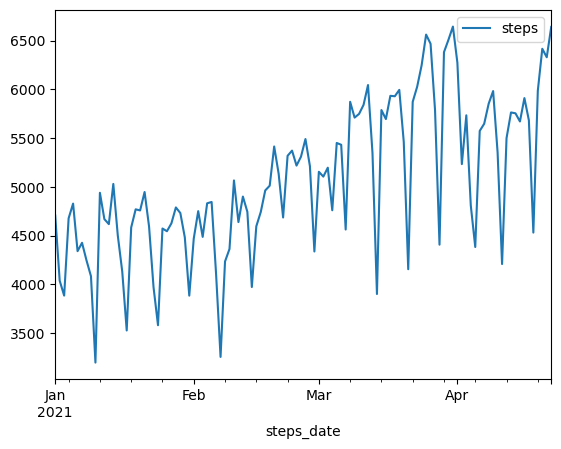

In [17]:
# Видим, что итого среднее кол-во шагов на юзера в день растет

df_line = df.groupby(['steps_date'])['steps'].mean().reset_index()
df_line.plot('steps_date' , 'steps' )

<Axes: xlabel='steps_date'>

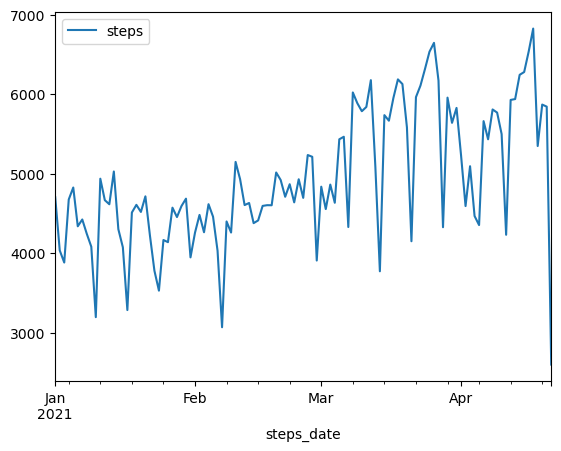

In [18]:
# То же самое видим для группы до регистрации. Возможно рост обусловлен сезонностью

df_line_before = df[df['period']=='before'].groupby(['steps_date'])['steps'].mean().reset_index()
df_line_before.plot('steps_date' , 'steps')

<Axes: xlabel='steps_date'>

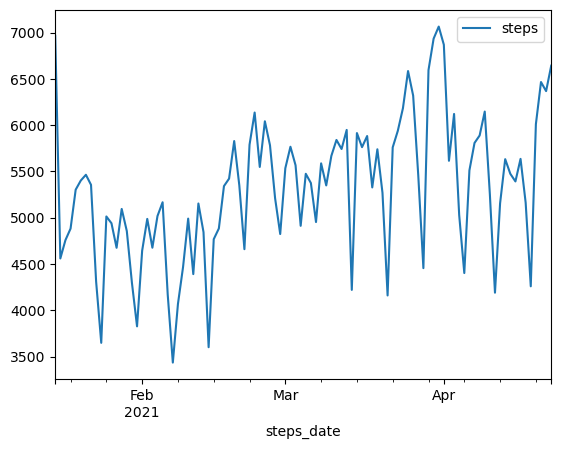

In [19]:
# То же самое видим для группы после регистрации

df_line_after = df[df['period']=='after'].groupby(['steps_date'])['steps'].mean().reset_index()
df_line_after.plot('steps_date' , 'steps')

In [20]:
#  Рассчитаем для каждого юзера: кол-во шагов в день в разбивке периодов

df_group = df.groupby(['user_id', 'period', 'platform']).agg(step_sum=('steps','sum'), active_days= ('user_id','count')).reset_index()
df_group['step_sum_1_day'] = df_group['step_sum']/df_group['active_days']
df_group.head()

,user_id,period,platform,step_sum,active_days,step_sum_1_day
0,19161801,after,IOS,97810,14,6986.428571
1,19161801,before,IOS,42694,14,3049.571429
2,20395818,after,IOS,2283,5,456.600000
3,20395818,before,IOS,14363,14,1025.928571
4,39957739,after,IOS,12792,12,1066.000000


# 2. Результаты

# 2.1. Итого

In [21]:
# Сравнение кол-ва шагов до и после регистрации
# Будем сравнить сумму шагов, ср кол-во шагов на юзера в день, медиану кол-во шагов на юзера в день (в случае наличия выбросов) в периодах

df_overall = df_group.groupby('period').agg(Uniq=('user_id','nunique'), Step_sum=('step_sum','sum'), 
                               Steps_mean_per_user_per_day=('step_sum_1_day','mean'), 
                               Steps_median_per_user_per_day=('step_sum_1_day','median'),
                               avg_active_days=('active_days','mean')).reset_index()

df_overall['Steps_mean_per_user_per_day'] = df_overall['Steps_mean_per_user_per_day'].astype(int)
df_overall['Steps_median_per_user_per_day'] = df_overall['Steps_median_per_user_per_day'].astype(int)
df_overall['avg_active_days'] = df_overall['avg_active_days'].astype(int)
df_overall

,period,Uniq,Step_sum,Steps_mean_per_user_per_day,Steps_median_per_user_per_day,avg_active_days
0,after,1856,108831004,5268,4428,10
1,before,1856,120006354,4839,4061,12


In [22]:
# Равенство средних в случае зависимых (парных) выборок: 
# Построим 95%-доверительный интервал для разности средних
# Так как доверительный интревал не накрывает ноль, то гипотеза о равенстве разности средних нулю отвергается.

df_overall_bef = df_group[df_group['period']=='before']
df_overall_aft = df_group[df_group['period']=='after']
df_overall_merge = pd.merge(df_overall_bef, df_overall_aft, how="left", on=["user_id"])
df_overall_merge['step_sum_diff'] = df_overall_merge['step_sum_1_day_y'] - df_overall_merge['step_sum_1_day_x']
df_overall_merge = df_overall_merge[['user_id', 'step_sum_diff']]

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 0), round(m-h,0), round(m+h,0)

mean_confidence_interval(df_overall_merge['step_sum_diff'])

(429.0, 321.0, 538.0)

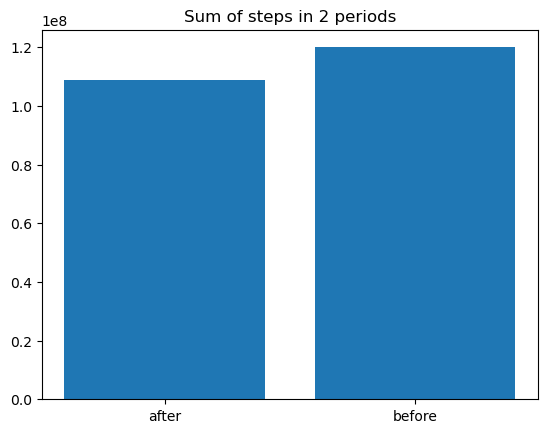

In [23]:
plt.bar(df_overall['period'], df_overall['Step_sum'])
plt.title("Sum of steps in 2 periods")
plt.show()

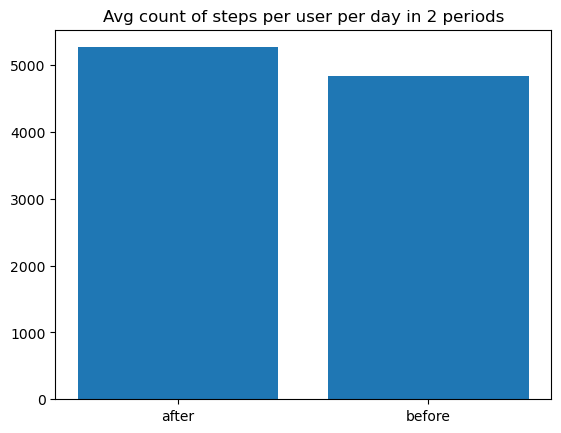

In [24]:
plt.bar(df_overall['period'], df_overall['Steps_mean_per_user_per_day'])
plt.title("Avg count of steps per user per day in 2 periods")
plt.show()

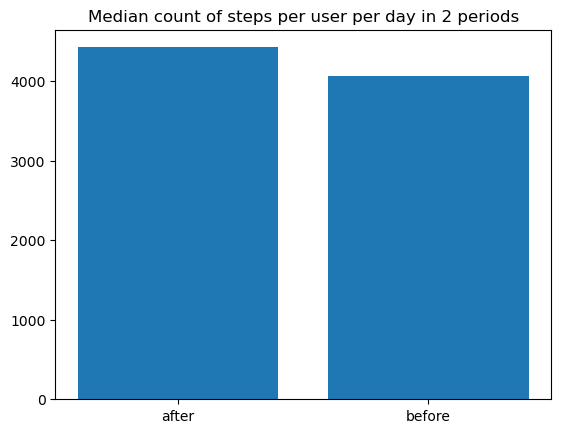

In [25]:
plt.bar(df_overall['period'], df_overall['Steps_median_per_user_per_day'])
plt.title("Median count of steps per user per day in 2 periods")
plt.show()

# 2.2. В разбивке будни/выходные

In [26]:
#  Рассчитаем для каждого юзера: кол-во шагов в день в разбивке периодов и будни/выходные

df_group_weekday = df.groupby(['user_id', 'period', 'weekday']).agg(step_sum=('steps','sum'), active_days= ('user_id','count')).reset_index()
df_group_weekday['step_sum_1_day'] = df_group_weekday['step_sum']/df_group_weekday['active_days']
df_group_weekday.head()

,user_id,period,weekday,step_sum,active_days,step_sum_1_day
0,19161801,after,0,31562,4,7890.5
1,19161801,after,1,66248,10,6624.8
2,19161801,before,0,8012,4,2003.0
3,19161801,before,1,34682,10,3468.2
4,20395818,after,0,386,1,386.0


In [27]:
# Сравнение кол-ва шагов до и после регистрации
# Будем сравнить сумму шагов, ср кол-во шагов на юзера в день, медиану кол-во шагов на юзера в день (в случае наличия выбросов) в периодах

df_weekday_overall = df_group_weekday.groupby(['period', 'weekday']).agg(Uniq=('user_id','nunique'), Step_sum=('step_sum','sum'), 
                               Steps_mean_per_user_per_day=('step_sum_1_day','mean'), 
                               Steps_median_per_user_per_day=('step_sum_1_day','median'),
                               avg_active_days=('active_days','mean')).reset_index()

df_weekday_overall['Steps_mean_per_user_per_day'] = df_weekday_overall['Steps_mean_per_user_per_day'].astype(int)
df_weekday_overall['Steps_median_per_user_per_day'] = df_weekday_overall['Steps_median_per_user_per_day'].astype(int)
df_weekday_overall['avg_active_days'] = df_weekday_overall['avg_active_days'].astype(int)
df_weekday_overall = df_weekday_overall.sort_values(['weekday', 'period'])
df_weekday_overall

,period,weekday,Uniq,Step_sum,Steps_mean_per_user_per_day,Steps_median_per_user_per_day,avg_active_days
0,after,0,1651,27226112,4631,3717,3
2,before,0,1789,30608627,4409,3453,3
1,after,1,1808,81664017,5541,4668,8
3,before,1,1835,89461785,5092,4221,9


# 2.3. В разбивке платформ

In [28]:
# Сравнение кол-ва шагов до и после регистрации в разбивке платформ

df_platforms = df_group.groupby(['platform', 'period']).agg(Uniq=('user_id','nunique'), Step_sum=('step_sum','sum'), 
                                             Steps_mean_per_user_per_day=('step_sum_1_day','mean'), 
                                             Steps_median_per_user_per_day=('step_sum_1_day','median'),
                                             avg_active_days=('active_days','mean')).reset_index()
df_platforms['Steps_mean_per_user_per_day'] = df_platforms['Steps_mean_per_user_per_day'].astype(int)
df_platforms['Steps_median_per_user_per_day'] = df_platforms['Steps_median_per_user_per_day'].astype(int)
df_platforms['avg_active_days'] = df_platforms['avg_active_days'].astype(int)
df_platforms

,platform,period,Uniq,Step_sum,Steps_mean_per_user_per_day,Steps_median_per_user_per_day,avg_active_days
0,ANDROID,after,161,8582504,4614,3578,11
1,ANDROID,before,161,4481171,2986,1886,6
2,IOS,after,1695,100248500,5330,4552,10
3,IOS,before,1695,115525183,5015,4255,13


In [29]:
# Равенство средних в случае зависимых (парных) выборок: 
# Построим 95%-доверительный интервал для разности средних
# Так как доверительный интревал не накрывает ноль, то гипотеза о равенстве разности средних нулю отвергается.

df_android_bef = df_group[(df_group['period']=='before')&(df_group['platform']=='ANDROID')]
df_android_aft = df_group[(df_group['period']=='after')&(df_group['platform']=='ANDROID')]
df_overall_merge = pd.merge(df_android_bef, df_android_aft, how="left", on=["user_id"])
df_overall_merge['step_sum_diff'] = df_overall_merge['step_sum_1_day_y'] - df_overall_merge['step_sum_1_day_x']
df_overall_merge = df_overall_merge[['user_id', 'step_sum_diff']]

mean_confidence_interval(df_overall_merge['step_sum_diff'])

(1628.0, 1123.0, 2133.0)

In [30]:
# Равенство средних в случае зависимых (парных) выборок: 
# Построим 95%-доверительный интервал для разности средних
# Так как доверительный интревал не накрывает ноль, то гипотеза о равенстве разности средних нулю отвергается.

df_ios_bef = df_group[(df_group['period']=='before')&(df_group['platform']=='IOS')]
df_ios_aft = df_group[(df_group['period']=='after')&(df_group['platform']=='IOS')]
df_overall_merge = pd.merge(df_ios_bef, df_ios_aft, how="left", on=["user_id"])
df_overall_merge['step_sum_diff'] = df_overall_merge['step_sum_1_day_y'] - df_overall_merge['step_sum_1_day_x']
df_overall_merge = df_overall_merge[['user_id', 'step_sum_diff']]

mean_confidence_interval(df_overall_merge['step_sum_diff'])

(315.0, 208.0, 423.0)

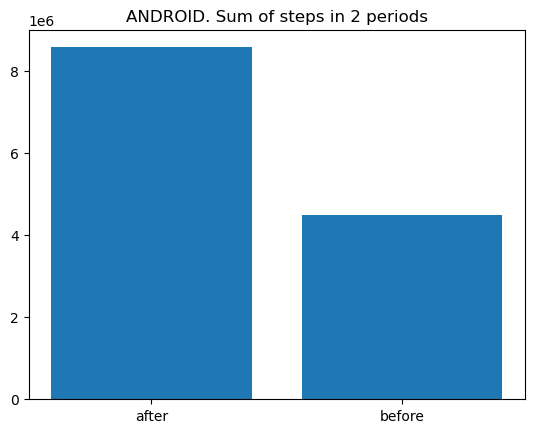

In [31]:
df_android = df_platforms[df_platforms['platform']=='ANDROID']
plt.bar(df_android['period'], df_android['Step_sum'])
plt.title("ANDROID. Sum of steps in 2 periods")
plt.show() 

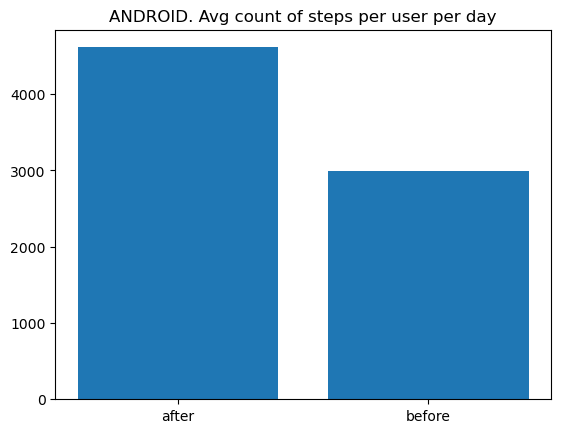

In [32]:
plt.bar(df_android['period'], df_android['Steps_mean_per_user_per_day'])
plt.title("ANDROID. Avg count of steps per user per day")
plt.show()

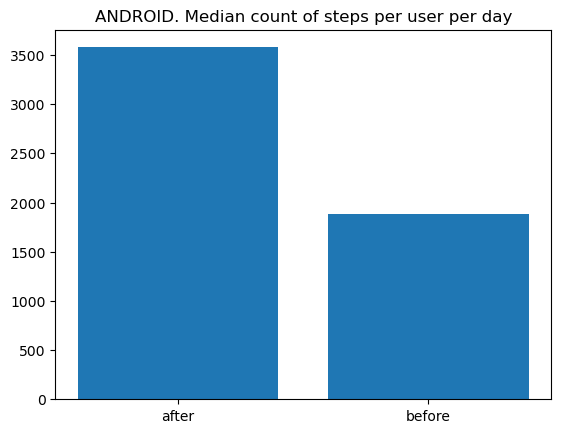

In [33]:
plt.bar(df_android['period'], df_android['Steps_median_per_user_per_day'])
plt.title("ANDROID. Median count of steps per user per day")
plt.show()

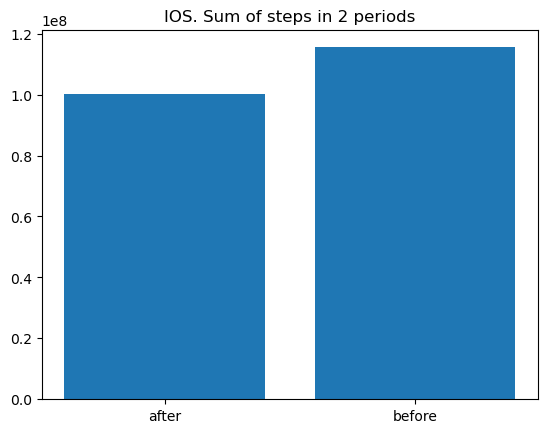

In [34]:
df_ios = df_platforms[df_platforms['platform']=='IOS']
plt.bar(df_ios['period'], df_ios['Step_sum'])
plt.title("IOS. Sum of steps in 2 periods")
plt.show() 

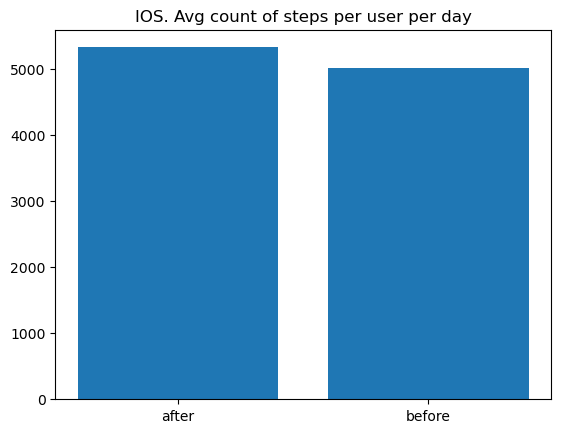

In [35]:
plt.bar(df_ios['period'], df_ios['Steps_mean_per_user_per_day'])
plt.title("IOS. Avg count of steps per user per day")
plt.show()  

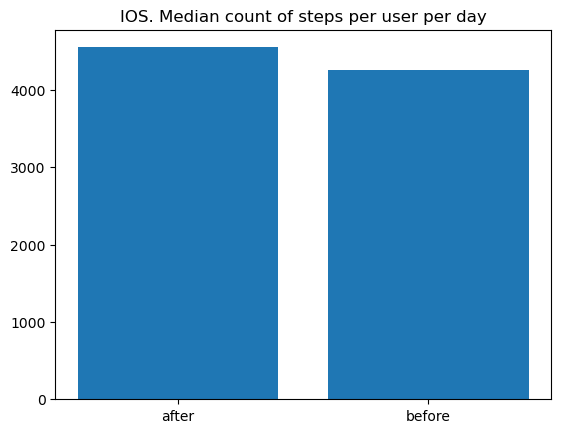

In [36]:
plt.bar(df_ios['period'], df_ios['Steps_median_per_user_per_day'])
plt.title("IOS. Median count of steps per user per day")
plt.show()  

# 3. Выводы

In [37]:
"""
Итого (1856 юзеров):
 - Общее кол-во шагов  уменьшилось с 120006354 до 108831004 (-10%)
 - Ср кол-во шагов на юзера в день увеличилось с 4839 до 5268 (+9%)
 - Медиана кол-во шагов на юзера в день увеличилось с 4061 до 4428 (+9%)   
 - Кол-во активных дней на юзера уменьшилось с 12 до 10 (-20%) 

В разбивке платформ:
ANDROID (161 юзеров)
 - Общее кол-во шагов увеличилось с 4481171 до 8582504 (+91%)
 - Ср кол-во шагов на юзера в день увеличилось с 2986 до 4614 (+54%)
 - Медиана кол-во шагов на юзера в день увеличилось с 1886 до 3578 (+90%)   
 - Кол-во активных дней на юзера уменьшилось с 6 до 11 (+57%) 
 
IOS (1695 юзеров)
 - Общее кол-во шагов уменьшилось с 115525183 до 100248500 (-13%)
 - Ср кол-во шагов на юзера в день увеличилось с 5015 до 5330 (+6%)
 - Медиана кол-во шагов на юзера в день увеличилось с 4255 до 4552 (+7%) 
 - Кол-во активных дней на юзера уменьшилось с 13 до 10 (-23%) 
 
Та же картина при разбивке на будни и выходные. + в будни юзеры больше ходят

На первый взгляд выглядит так, будто регистрация отрицательно влияет на кол-во активных дней (было 12, стало 10), 
из-за чего падает общее кол-во шагов (было 120006354, стало 108831004), несмотря на рост кол-ва шагов в 
день(было 4839, стало 5268). Но нужно учитывать, что присутствует отток. Для составления полной картины нужно взять 
когорту новых юзеров и посмотреть их ретеншн. Возможно это в этом причина падения кол-ва активных дней.

+не учтена сезонность. Требуются данные за больший период.

Дополнительно можно посмотреть метрики в разбивке стран, пола, возрастным группам и тд.

"""

'\nИтого (1856 юзеров):\n - Общее кол-во шагов \xa0уменьшилось с 120006354 до 108831004 (-10%)\n - Ср кол-во шагов на юзера в день увеличилось с 4839 до 5268 (+9%)\n - Медиана кол-во шагов на юзера в день увеличилось с 4061 до 4428 (+9%)   \n - Кол-во активных дней на юзера уменьшилось с 12 до 10 (-20%) \n\nВ разбивке платформ:\nANDROID (161 юзеров)\n - Общее кол-во шагов увеличилось с 4481171 до 8582504 (+91%)\n - Ср кол-во шагов на юзера в день увеличилось с 2986 до 4614 (+54%)\n - Медиана кол-во шагов на юзера в день увеличилось с 1886 до 3578 (+90%)   \n - Кол-во активных дней на юзера уменьшилось с 6 до 11 (+57%) \n \nIOS (1695 юзеров)\n - Общее кол-во шагов уменьшилось с 115525183 до 100248500 (-13%)\n - Ср кол-во шагов на юзера в день увеличилось с 5015 до 5330 (+6%)\n - Медиана кол-во шагов на юзера в день увеличилось с 4255 до 4552 (+7%) \n - Кол-во активных дней на юзера уменьшилось с 13 до 10 (-23%) \n \nТа же картина при разбивке на будни и выходные. + в будни юзеры больше 